In [1]:
import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
PATH_DATA = 'data/frames'
NO_MAX_FRAMES = [50, 100, 200, 400]
NO_FRAMES_PREDICTED_AHEAD = [1, 6, 18, 36]
NO_DATA = 50000
SIZE_FRAGMENT = [3, 5]

#### Files

In [3]:
files_s = np.array(sorted(glob.glob(os.path.join(PATH_DATA, '*'))))
print(f'Number of files: {len(files_s)}')

Number of files: 417


In [4]:
image_s = []
for i in range(len(files_s)):
    filename = files_s[i]
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_s.append(image)
image_s = np.array(image_s)
image_s = image_s.reshape(image_s.shape[0], 3, image_s.shape[1], image_s.shape[2])
print(image_s.shape)

(417, 3, 1000, 1000)


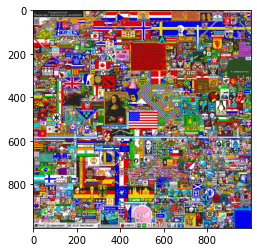

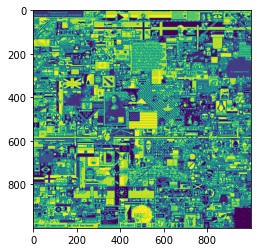

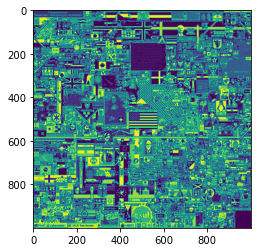

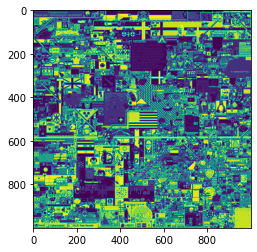

In [5]:
img = image_s.reshape(-1, 1000, 1000, 3)
plt.imshow(img[-1])
plt.show()

img_red_channel_s = img[:, :, :, 0].reshape(img.shape[0], 1, 1000, 1000)
plt.imshow(img_red_channel_s[-1, 0])
plt.show()

img_green_channel_s = img[:, :, :, 1].reshape(img.shape[0], 1, 1000, 1000)
plt.imshow(img_green_channel_s[-1, 0])
plt.show()

img_blue_channel_s = img[:, :, :, 2].reshape(img.shape[0], 1, 1000, 1000)
plt.imshow(img_blue_channel_s[-1, 0])
plt.show()

#### Creating files

In [6]:
for no_frames in NO_MAX_FRAMES:
    for no_frames_predicted in NO_FRAMES_PREDICTED_AHEAD:
        for size in SIZE_FRAGMENT:
            img_subset_red_channel_s = img_red_channel_s[:no_frames]
            img_subset_green_channel_s = img_green_channel_s[:no_frames]
            img_subset_blue_channel_s = img_blue_channel_s[:no_frames]

            np.random.seed(16)
            random_starting_img_s = np.random.randint(
                0, len(img_subset_red_channel_s) - no_frames_predicted, NO_DATA)
            random_x_pos_s = np.random.randint(0, 1000 - size, NO_DATA)
            random_y_pos_s = np.random.randint(0, 1000 - size, NO_DATA)
            
            # Red channel
            image_fragment_s = []
            img_channel_s = img_subset_red_channel_s
            for i, img_no in enumerate(random_starting_img_s):
                random_x_pos = random_x_pos_s[i]
                random_y_pos = random_y_pos_s[i]
                image_fragment = []
                image = img_channel_s[img_no]
                image_next = img_channel_s[img_no+no_frames_predicted]
                image_fragment.append(
                    image[:, random_x_pos:random_x_pos+size, random_y_pos:random_y_pos+size])
                image_fragment.append(
                    image_next[:, random_x_pos:random_x_pos+size, random_y_pos:random_y_pos+size])
                image_fragment_s.append(image_fragment)
            image_fragment_s = np.array(image_fragment_s)

            train_x = image_fragment_s[:, 0] / 255
            train_y = image_fragment_s[:, 1, 0, 1, 1] / 255
            np.save(f'data/frames_cropped/train_x_red_noFrames{no_frames}_noFramesPredicedAhead{no_frames_predicted}_size{size}', train_x)
            np.save(f'data/frames_cropped/train_y_red_noFrames{no_frames}_noFramesPredicedAhead{no_frames_predicted}_size{size}', train_y)
        

            # Green channel
            image_fragment_s = []
            img_channel_s = img_subset_green_channel_s
            for i, img_no in enumerate(random_starting_img_s):
                random_x_pos = random_x_pos_s[i]
                random_y_pos = random_y_pos_s[i]
                image_fragment = []
                image = img_channel_s[img_no]
                image_next = img_channel_s[img_no+no_frames_predicted]
                image_fragment.append(
                    image[:, random_x_pos:random_x_pos+size, random_y_pos:random_y_pos+size])
                image_fragment.append(
                    image_next[:, random_x_pos:random_x_pos+size, random_y_pos:random_y_pos+size])
                image_fragment_s.append(image_fragment)
            image_fragment_s = np.array(image_fragment_s)

            train_x = image_fragment_s[:, 0] / 255
            train_y = image_fragment_s[:, 1, 0, 1, 1] / 255
            np.save(f'data/frames_cropped/train_x_green_noFrames{no_frames}_noFramesPredicedAhead{no_frames_predicted}_size{size}', train_x)
            np.save(f'data/frames_cropped/train_y_green_noFrames{no_frames}_noFramesPredicedAhead{no_frames_predicted}_size{size}', train_y)
    
        
            # Blue channel
            image_fragment_s = []
            img_channel_s = img_subset_blue_channel_s
            for i, img_no in enumerate(random_starting_img_s):
                random_x_pos = random_x_pos_s[i]
                random_y_pos = random_y_pos_s[i]
                image_fragment = []
                image = img_channel_s[img_no]
                image_next = img_channel_s[img_no+no_frames_predicted]
                image_fragment.append(
                    image[:, random_x_pos:random_x_pos+size, random_y_pos:random_y_pos+size])
                image_fragment.append(
                    image_next[:, random_x_pos:random_x_pos+size, random_y_pos:random_y_pos+size])
                image_fragment_s.append(image_fragment)
            image_fragment_s = np.array(image_fragment_s)

            train_x = image_fragment_s[:, 0] / 255
            train_y = image_fragment_s[:, 1, 0, 1, 1] / 255
            np.save(f'data/frames_cropped/train_x_blue_noFrames{no_frames}_noFramesPredicedAhead{no_frames_predicted}_size{size}', train_x)
            np.save(f'data/frames_cropped/train_y_blue_noFrames{no_frames}_noFramesPredicedAhead{no_frames_predicted}_size{size}', train_y)

In [7]:
for no_frames in NO_MAX_FRAMES:
    for no_frames_predicted in NO_FRAMES_PREDICTED_AHEAD:
        for size in SIZE_FRAGMENT:
            img_subset_red_channel_s = img_red_channel_s[:no_frames]
            img_subset_green_channel_s = img_green_channel_s[:no_frames]
            img_subset_blue_channel_s = img_blue_channel_s[:no_frames]

            np.random.seed(17)
            random_starting_img_s = np.random.randint(
                0, len(img_subset_red_channel_s) - no_frames_predicted, int(NO_DATA / 5))
            random_x_pos_s = np.random.randint(0, 1000 - size, int(NO_DATA / 5))
            random_y_pos_s = np.random.randint(0, 1000 - size, int(NO_DATA / 5))
            
            # Red channel
            image_fragment_s = []
            img_channel_s = img_subset_red_channel_s
            for i, img_no in enumerate(random_starting_img_s):
                random_x_pos = random_x_pos_s[i]
                random_y_pos = random_y_pos_s[i]
                image_fragment = []
                image = img_channel_s[img_no]
                image_next = img_channel_s[img_no+no_frames_predicted]
                image_fragment.append(
                    image[:, random_x_pos:random_x_pos+size, random_y_pos:random_y_pos+size])
                image_fragment.append(
                    image_next[:, random_x_pos:random_x_pos+size, random_y_pos:random_y_pos+size])
                image_fragment_s.append(image_fragment)
            image_fragment_s = np.array(image_fragment_s)

            train_x = image_fragment_s[:, 0] / 255
            train_y = image_fragment_s[:, 1, 0, 1, 1] / 255
            np.save(f'data/frames_cropped/test_x_red_noFrames{no_frames}_noFramesPredicedAhead{no_frames_predicted}_size{size}', train_x)
            np.save(f'data/frames_cropped/test_y_red_noFrames{no_frames}_noFramesPredicedAhead{no_frames_predicted}_size{size}', train_y)
        

            # Green channel
            image_fragment_s = []
            img_channel_s = img_subset_green_channel_s
            for i, img_no in enumerate(random_starting_img_s):
                random_x_pos = random_x_pos_s[i]
                random_y_pos = random_y_pos_s[i]
                image_fragment = []
                image = img_channel_s[img_no]
                image_next = img_channel_s[img_no+no_frames_predicted]
                image_fragment.append(
                    image[:, random_x_pos:random_x_pos+size, random_y_pos:random_y_pos+size])
                image_fragment.append(
                    image_next[:, random_x_pos:random_x_pos+size, random_y_pos:random_y_pos+size])
                image_fragment_s.append(image_fragment)
            image_fragment_s = np.array(image_fragment_s)

            train_x = image_fragment_s[:, 0] / 255
            train_y = image_fragment_s[:, 1, 0, 1, 1] / 255
            np.save(f'data/frames_cropped/test_x_green_noFrames{no_frames}_noFramesPredicedAhead{no_frames_predicted}_size{size}', train_x)
            np.save(f'data/frames_cropped/test_y_green_noFrames{no_frames}_noFramesPredicedAhead{no_frames_predicted}_size{size}', train_y)
    
        
            # Blue channel
            image_fragment_s = []
            img_channel_s = img_subset_blue_channel_s
            for i, img_no in enumerate(random_starting_img_s):
                random_x_pos = random_x_pos_s[i]
                random_y_pos = random_y_pos_s[i]
                image_fragment = []
                image = img_channel_s[img_no]
                image_next = img_channel_s[img_no+no_frames_predicted]
                image_fragment.append(
                    image[:, random_x_pos:random_x_pos+size, random_y_pos:random_y_pos+size])
                image_fragment.append(
                    image_next[:, random_x_pos:random_x_pos+size, random_y_pos:random_y_pos+size])
                image_fragment_s.append(image_fragment)
            image_fragment_s = np.array(image_fragment_s)

            train_x = image_fragment_s[:, 0] / 255
            train_y = image_fragment_s[:, 1, 0, 1, 1] / 255
            np.save(f'data/frames_cropped/test_x_blue_noFrames{no_frames}_noFramesPredicedAhead{no_frames_predicted}_size{size}', train_x)
            np.save(f'data/frames_cropped/test_y_blue_noFrames{no_frames}_noFramesPredicedAhead{no_frames_predicted}_size{size}', train_y)